In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

In [12]:
df = pd.read_csv('exam_sessions.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'exam_sessions.csv'

In [4]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['finished_at'] = pd.to_datetime(df['finished_at'])

In [5]:
df_finished = df[df['status'] == 'finished'].copy()
df_finished = df_finished.sort_values(['user_id', 'started_at'])
df_finished = df_finished.sort_values(['user_id', 'started_at'])

In [6]:
overlap_records = []

for user, group in df_finished.groupby('user_id'):
    n = len(group)
    if n <= 1:
        continue  # no possible overlaps

    starts = group['started_at'].values.astype('datetime64[ns]')
    ends = group['finished_at'].values.astype('datetime64[ns]')
    session_ids = group['exam_session_id'].values

    # Create a broadcasted comparison: later_starts < current_ends
    # Upper-triangular comparison only (i < j)
    start_matrix = np.broadcast_to(starts, (n, n))
    end_matrix = np.broadcast_to(ends, (n, n)).T

    overlap_mask = (start_matrix < end_matrix) & (np.triu(np.ones((n, n), dtype=bool), k=1))

    # Extract overlapping pairs
    idx_i, idx_j = np.where(overlap_mask)
    for i, j in zip(idx_i, idx_j):
        overlap_records.append({
            'user_id': user,
            'session1': session_ids[i],
            'session2': session_ids[j],
            'start1': starts[i],
            'end1': ends[i],
            'start2': starts[j],
            'end2': ends[j]
        })

# Convert to DataFrame
overlap_df = pd.DataFrame(overlap_records)
overlap_df.head()

,user_id,session1,session2,start1,end1,start2,end2
0,003afb9c-ade5-4ebe-8e74-cc16c4f98b7b,21160acb-d21f-42d5-848e-c1c2a1d8bd8f,69aa6089-f9ea-4b13-8f84-7df19c811748,2025-04-24 12:04:06,2025-04-24 19:23:30,2025-04-24 18:58:59,2025-04-24 19:12:38
1,003b1aa9-ee23-4874-b957-4deb63b6eeb7,c15248b4-b683-4b2c-92ef-52ca17edbf42,ab8ac2e9-a814-426a-b38f-a47623daa34c,2025-02-24 01:52:49,2025-02-24 01:58:40,2025-02-24 01:53:03,2025-02-24 01:57:27
2,00467d7b-e5ab-440d-b335-afeeeec27b89,408ba190-2851-487a-a620-d02614ea82bf,ed59c640-5e1a-417b-9c16-58f80e193dfd,2025-07-12 22:50:02,2025-07-15 04:19:58,2025-07-12 22:50:17,2025-07-12 23:19:34
3,00467d7b-e5ab-440d-b335-afeeeec27b89,408ba190-2851-487a-a620-d02614ea82bf,689af6ad-930d-464c-9e97-b2708f6b3c2b,2025-07-12 22:50:02,2025-07-15 04:19:58,2025-07-13 00:23:30,2025-07-13 00:50:58
4,00467d7b-e5ab-440d-b335-afeeeec27b89,408ba190-2851-487a-a620-d02614ea82bf,a1326dc9-7a82-4018-a83b-5639f8cb94b3,2025-07-12 22:50:02,2025-07-15 04:19:58,2025-07-13 00:51:41,2025-07-13 01:07:39


In [7]:
overlap_df['user_id'].unique()

array(['003afb9c-ade5-4ebe-8e74-cc16c4f98b7b',
       '003b1aa9-ee23-4874-b957-4deb63b6eeb7',
       '00467d7b-e5ab-440d-b335-afeeeec27b89', ...,
       'ffb0268a-5262-47c1-8224-c1657c6766a1',
       'ffb54987-804f-4f7c-9035-9c740a8515ec',
       'ffd4ac85-0148-441f-9213-1a90593062d6'], dtype=object)

In [8]:
len(overlap_df['user_id'].unique())

3068

In [9]:
df['status'].unique()    

array(['finished', 'started', 'discarded', 'archived', 'ready'],
      dtype=object)

In [10]:
df[df['status'] == 'ready']

,user_id,exam_session_id,started_at,finished_at,score,status
324434,c64117cc-3be7-4083-a053-f8e846c2a840,d6d63c61-23c1-4fc3-a4cf-91e6df2cd77d,2025-06-29 04:29:10,NaT,NaN,ready


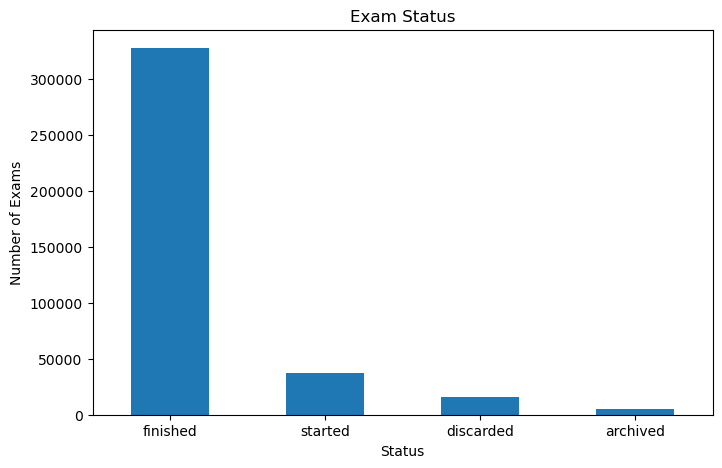

In [11]:
status_counts = df['status'].value_counts()
status_counts.drop('ready', inplace = True)

plt.figure(figsize=(8,5))
status_counts.plot(kind='bar')
plt.title('Exam Status')
plt.xlabel('Status')
plt.ylabel('Number of Exams')
plt.xticks(rotation=0)
plt.show()